# Exercise 13

This particular Automobile Data Set includes a good mix of categorical values as well as continuous values and serves as a useful example that is relatively easy to understand. Since domain understanding is an important aspect when deciding how to encode various categorical values - this data set makes a good case study.

Read the data into Pandas

In [1]:
import pandas as pd

# Define the headers since the data does not have any
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

# Read in the CSV file and convert "?" to NaN
df = pd.read_csv("http://mlr.cs.umass.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [2]:
df.shape

(205, 26)

In [3]:
df.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [4]:
obj_df = df.select_dtypes(include=['object']).copy()
print(obj_df.head())

          make fuel_type aspiration num_doors   body_style drive_wheels  \
0  alfa-romero       gas        std       two  convertible          rwd   
1  alfa-romero       gas        std       two  convertible          rwd   
2  alfa-romero       gas        std       two    hatchback          rwd   
3         audi       gas        std      four        sedan          fwd   
4         audi       gas        std      four        sedan          4wd   

  engine_location engine_type num_cylinders fuel_system  
0           front        dohc          four        mpfi  
1           front        dohc          four        mpfi  
2           front        ohcv           six        mpfi  
3           front         ohc          four        mpfi  
4           front         ohc          five        mpfi  


# Exercise 13.1

Does the database contain missing values? If so, replace them using one of the methods explained in class

In [5]:
# check for missing values
df.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [6]:
print(df.shape) #dimension de data inicial
print(df.dropna().shape) #dimension de data si se borraran nas
df[df.normalized_losses.notnull()].shape #dimension de data debida a na´s de la variable normalize_losses

(205, 26)
(159, 26)


(164, 26)

In [7]:
164/205 ## el 20% de nas se debe a la variable normalized_losses

0.8

In [8]:
df.normalized_losses.fillna(df.normalized_losses.median(), inplace=True) ##remplazando por la mediana de la variable normalized_losses

In [9]:
# check for missing values
import numpy as np
varnas=np.array(df.isnull().sum()[df.isnull().sum()!=0].index)
varnas

array(['num_doors', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price'],
      dtype=object)

In [10]:
df[varnas].dtypes #verificando tipo de variables que contienen nulos

#for i in range(len(varnas)):
 #   print(i)    

num_doors      object
bore          float64
stroke        float64
horsepower    float64
peak_rpm      float64
price         float64
dtype: object

In [11]:
print(df.num_doors.mode())
df.num_doors.fillna(str(df.num_doors.mode()), inplace=True) #remplazando por la moda num_doors
#remplazando por la mediana el resto de nulos, para las demas variables
for i in range(1,6):
    df[varnas[i]].fillna(df[varnas[i]].median(), inplace=True) #remplazando por la moda num_doors
# check for missing values
df.isnull().sum()

0    four
dtype: object


symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

# Exercise 13.2

Split the data into training and testing sets

Train a Random Forest Regressor to predict the price of a car using the nominal features

# Volviendo dummies las categorias del dataset:

In [12]:
obj_df.head()
obj_df.drop(['num_doors', 'num_cylinders'], axis='columns', inplace=True)

In [13]:
obj_df = pd.get_dummies(obj_df)
obj_df.head()

,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,...,engine_type_ohcv,engine_type_rotor,fuel_system_1bbl,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X=obj_df
y=df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9)

#reg=RandomForestRegressor(random_state=81).fit(X_train,y_train)

#y_pred=reg.predict(X_test)
#rmse=sqrt(mean_squared_error(y_test,y_pred))

#print('RMSE:',rmse)

# Entrenando random forest:

# tuning n_estimators

In [25]:
import math
from sklearn import metrics
# list of values to try for n_estimators
estimator_range = range(10, 310, 10)

# list to store the average Accuracy for each value of n_estimators
accuracy_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    reg=RandomForestRegressor(n_estimators=estimator, random_state=1, n_jobs=-1).fit(X_train,y_train)
    y_pred=reg.predict(X_test)
    #rmse=
    accuracy_scores.append(math.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print(estimator)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300


In [27]:
import matplotlib.pyplot as plt
print(min(accuracy_scores))

###########

plt.plot(estimator_range, accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('ecm')

accuracy_scores

3280.8302103872406


[3447.0062257339823,
 3403.1289263483413,
 3370.798798045538,
 3318.6253380663493,
 3320.9538270738053,
 3280.8302103872406,
 3284.5572783438224,
 3292.771029289749,
 3290.659882050192,
 3295.7004906806737,
 3303.1358827232857,
 3305.1809767984846,
 3308.9923123262133,
 3324.277908846636,
 3323.9292543315905,
 3323.348493942205,
 3329.303756783372,
 3331.0872232707347,
 3333.8074550271813,
 3339.0963618366313,
 3334.2244183292673,
 3339.1838937609573,
 3335.395572486356,
 3335.433390810702,
 3338.6431532966963,
 3335.3801011535197,
 3331.3715517411847,
 3334.5089300377786,
 3330.3078518377465,
 3323.7146228800916]

# Tuning max_features

In [29]:
# list of values to try for max_features
feature_range = range(1, 77)

# list to store the average Accuracy for each value of max_features
accuracy_scores = []

# use 10-fold cross-validation with each value of max_features (WARNING: SLOW!)
for feature in feature_range:
    reg=RandomForestRegressor(n_estimators=60, max_features=feature, random_state=1, n_jobs=-1).fit(X_train,y_train)
    y_pred=reg.predict(X_test)
    #rmse=
    accuracy_scores.append(math.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print(feature)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51


ValueError: max_features must be in (0, n_features]

251.69209200219657


[4657.94526956944,
 4816.938888145945,
 4686.213052351578,
 3961.797132452475,
 3784.2934813157453,
 3869.1000665799093,
 3710.4705709033597,
 3200.334626323127,
 3341.6685768963307,
 2662.9655571882927,
 2689.2567141839872,
 2400.232681522773,
 2247.1751526626113,
 2293.3639169837566,
 2100.6835619402004,
 1984.762464206747,
 1887.6409549142847,
 1806.3788488306893,
 1650.945028435637,
 1573.1038346248915,
 1567.454485328043,
 1526.5496468962097,
 1432.654758954105,
 1242.5751514405092,
 1127.1737173480794,
 1199.2552496681978,
 986.7103880498962,
 1117.8217659668426,
 975.8594397940186,
 949.9950438825679,
 983.9102667745788,
 859.9559431992722,
 933.0536099995396,
 800.1806295362917,
 803.529837624518,
 856.5581393125609,
 798.0177470924564,
 701.9325683096961,
 711.7796573935832,
 688.4599697244428,
 671.4857910884298,
 627.9173003017746,
 614.8931688137757,
 607.7651120957579,
 604.6011193968811,
 562.7733975695894,
 565.3670091486183,
 582.4000016278793,
 508.1859922808586,
 503.

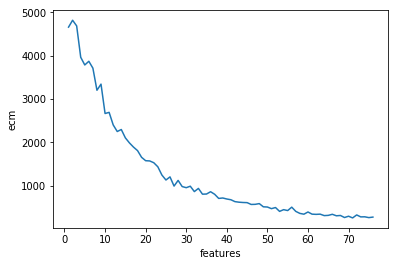

In [571]:
#print(len(accuracy_scores))
#print(feature_range)
print(min(accuracy_scores))

###########

plt.plot(feature_range, accuracy_scores)
plt.xlabel('features')
plt.ylabel('ecm')

accuracy_scores

In [572]:
reg=RandomForestRegressor(n_estimators=130, max_features=72, random_state=1, n_jobs=-1).fit(X2,y_train)
y_pred=reg.predict(X3)
#rmse=
math.sqrt(metrics.mean_squared_error(y_test,y_pred))

326.7286167671356

# Exercise 13.3

Create dummy variables for the categorical features

Train a Random Forest Regressor and compare

# volviendo entera la variable num_doors:

In [573]:
#print(df[['num_doors', 'num_cylinders']].head())
print(df['num_doors'].value_counts())

four                        114
two                          89
0    four\ndtype: object      2
Name: num_doors, dtype: int64


In [574]:
df['num_doors'][df['num_doors']=='two']=2
df['num_doors'][df['num_doors']=='four']=4
df['num_doors'][df['num_doors']=='0    four\ndtype: object']=4

/Users/juand./anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/juand./anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/juand./anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing import

In [575]:
df['num_doors']=pd.to_numeric(df['num_doors'])
print(df.dtypes)
df.head()

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors              int64
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object


,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,115.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# volviendo entera la variable num_cylinders:

In [576]:
print(df['num_cylinders'].value_counts())

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num_cylinders, dtype: int64


In [577]:
df['num_cylinders'][df['num_cylinders']=='four']=4
df['num_cylinders'][df['num_cylinders']=='six']=6
df['num_cylinders'][df['num_cylinders']=='five']=5
df['num_cylinders'][df['num_cylinders']=='eight']=8
df['num_cylinders'][df['num_cylinders']=='two']=2
df['num_cylinders'][df['num_cylinders']=='twelve']=12
df['num_cylinders'][df['num_cylinders']=='three']=3

/Users/juand./anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/juand./anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/juand./anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing import

In [578]:
df['num_cylinders']=pd.to_numeric(df['num_cylinders'])
print(df.dtypes)
df.head()

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors              int64
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders          int64
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object


,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,115.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# concatenando variables categoricas con variables continuas para dejar un solo dataframe:

In [579]:
print(obj_df.shape)
df.shape

(205, 51)


(205, 26)

In [580]:
varcont=df.select_dtypes(exclude=['object'])

In [581]:
print(varcont.head())
print(varcont.dtypes)
print(obj_df.dtypes)

   symboling  normalized_losses  num_doors  wheel_base  length  width  height  \
0          3              115.0          2        88.6   168.8   64.1    48.8   
1          3              115.0          2        88.6   168.8   64.1    48.8   
2          1              115.0          2        94.5   171.2   65.5    52.4   
3          2              164.0          4        99.8   176.6   66.2    54.3   
4          2              164.0          4        99.4   176.6   66.4    54.3   

   curb_weight  num_cylinders  engine_size  bore  stroke  compression_ratio  \
0         2548              4          130  3.47    2.68                9.0   
1         2548              4          130  3.47    2.68                9.0   
2         2823              6          152  2.68    3.47                9.0   
3         2337              4          109  3.19    3.40               10.0   
4         2824              5          136  3.19    3.40                8.0   

   horsepower  peak_rpm  city_mpg  hig

In [582]:
dataf=pd.DataFrame(pd.concat([obj_df, varcont], axis=1))
dataf.head()

,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,...,num_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1,0,0,0,0,0,0,0,0,0,...,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,1,0,0,0,0,0,0,0,0,0,...,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,0,0,0,0,0,0,0,0,0,...,6,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,0,1,0,0,0,0,0,0,0,0,...,4,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,0,1,0,0,0,0,0,0,0,0,...,5,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [583]:
y=dataf.price
X=dataf.drop('price', axis='columns',inplace=False)

In [584]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9)

# tuning n_estimators

In [585]:
# list of values to try for n_estimators
estimator_range = range(10, 310, 10)

# list to store the average Accuracy for each value of n_estimators
accuracy_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    reg=RandomForestRegressor(n_estimators=estimator, random_state=1, n_jobs=-1).fit(X_train,y_train)
    y_pred=reg.predict(X_test)
    #rmse=
    accuracy_scores.append(math.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print(estimator)

print(min(accuracy_scores))

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
2122.2967908553446


[2307.1352571237476,
 2195.038093808526,
 2122.2967908553446,
 2170.493953177344,
 2181.017012474086,
 2224.649217798378,
 2178.399389862618,
 2160.923445476183,
 2141.2270685527287,
 2139.6672416836814,
 2166.7929741231605,
 2168.2020090526908,
 2166.535268098562,
 2157.570003442162,
 2142.481131833755,
 2141.4949565780357,
 2136.4902562899797,
 2130.943876481,
 2130.979269771842,
 2137.8642876409035,
 2143.8740717592905,
 2146.3057126430776,
 2155.0711602340944,
 2145.322811771757,
 2151.835678019351,
 2150.6309477643003,
 2144.953522875365,
 2149.358845526841,
 2143.981662296249,
 2141.8040941627864]

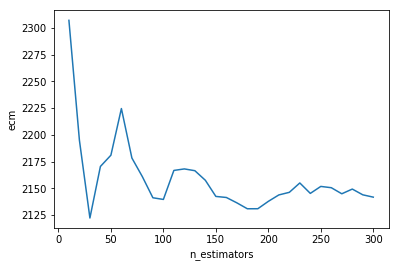

In [586]:
###########

plt.plot(estimator_range, accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('ecm')

accuracy_scores

# Tuning max_features

In [587]:
# list of values to try for max_features
feature_range = range(1, 51)

# list to store the average Accuracy for each value of max_features
accuracy_scores = []

# use 10-fold cross-validation with each value of max_features (WARNING: SLOW!)
for feature in feature_range:
    reg=RandomForestRegressor(n_estimators=30, max_features=feature, random_state=1, n_jobs=-1).fit(X_train,y_train)
    y_pred=reg.predict(X_test)
    #rmse=
    accuracy_scores.append(math.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print(feature)

#print(len(accuracy_scores))
#print(feature_range)
print(min(accuracy_scores))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
1962.3983245522288


[2469.0660953087754,
 2189.381982479657,
 2111.6215667005795,
 2297.398136255879,
 2243.1702187553706,
 2056.519999242975,
 2126.2248695142503,
 2232.393531587071,
 2143.719968733615,
 2109.030329696285,
 2161.4261101601096,
 1962.3983245522288,
 2091.473164761049,
 2228.302867754767,
 2115.533211551803,
 2117.1432054878405,
 2082.7299695688334,
 2173.9335754323392,
 2148.939120769701,
 2190.62039503948,
 2188.7616904471006,
 2102.111944827929,
 2343.39018540244,
 2119.980714538422,
 2308.1146031717412,
 1998.7385814559104,
 2300.0711822793132,
 2270.9564776809116,
 2124.5547371558137,
 2272.909037981073,
 2306.8469141632727,
 2034.0576113374739,
 2117.150094346766,
 2166.614186596646,
 2222.148413701919,
 2308.815169001072,
 2269.5504312059065,
 2295.0675544998817,
 2269.9638942885745,
 2011.063317833592,
 2053.1336427017472,
 2345.8520049382987,
 2211.9510880581283,
 2103.0813808128255,
 2250.0699949523414,
 2166.499013116833,
 2067.325341356323,
 2144.083423734831,
 2261.30858437274

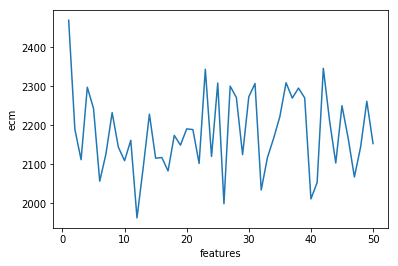

In [589]:
###########

plt.plot(feature_range, accuracy_scores)
plt.xlabel('features')
plt.ylabel('ecm')
accuracy_scores

In [590]:
reg=RandomForestRegressor(n_estimators=30, max_features=12, random_state=1, n_jobs=-1).fit(X_train,y_train)
y_pred=reg.predict(X_test)
#rmse=
math.sqrt(metrics.mean_squared_error(y_test,y_pred))

1962.3983245522288

# Exercise 13.4

Apply two other methods of categorical encoding

compare the results

In [591]:
!pip install category_encoders

In [592]:
import category_encoders as ce

# Primer método de codificación:

In [593]:
obj_df = df.select_dtypes(include=['object']).copy()
print(obj_df.head())

          make fuel_type aspiration   body_style drive_wheels engine_location  \
0  alfa-romero       gas        std  convertible          rwd           front   
1  alfa-romero       gas        std  convertible          rwd           front   
2  alfa-romero       gas        std    hatchback          rwd           front   
3         audi       gas        std        sedan          fwd           front   
4         audi       gas        std        sedan          4wd           front   

  engine_type fuel_system  
0        dohc        mpfi  
1        dohc        mpfi  
2        ohcv        mpfi  
3         ohc        mpfi  
4         ohc        mpfi  


In [595]:
X_ = ce.BinaryEncoder().fit_transform(obj_df, axis=1)

In [596]:
dataf=pd.DataFrame(pd.concat([X_, varcont], axis=1))
dataf.head()

,make_0,make_1,make_2,make_3,make_4,make_5,fuel_type_0,fuel_type_1,aspiration_0,aspiration_1,...,num_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0,0,0,0,0,1,0,1,0,1,...,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,0,0,0,0,0,1,0,1,0,1,...,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,0,0,0,0,0,1,0,1,0,1,...,6,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,0,0,0,0,1,0,0,1,0,1,...,4,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,0,0,0,0,1,0,0,1,0,1,...,5,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [597]:
y=dataf.price
X=dataf.drop('price', axis='columns',inplace=False)

In [598]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9)

# tuning n_estimators

In [599]:
# list of values to try for n_estimators
estimator_range = range(10, 310, 10)

# list to store the average Accuracy for each value of n_estimators
accuracy_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    reg=RandomForestRegressor(n_estimators=estimator, random_state=1, n_jobs=-1).fit(X_train,y_train)
    y_pred=reg.predict(X_test)
    #rmse=
    accuracy_scores.append(math.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print(estimator)

print(min(accuracy_scores))

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
2182.036760551216


[2512.804848363983,
 2426.8912332914365,
 2223.863445701459,
 2291.919317566376,
 2289.9538908949326,
 2294.5312218580534,
 2267.345847364094,
 2251.8805735974865,
 2244.689743578497,
 2235.8788483534604,
 2221.028998825281,
 2198.8839618524744,
 2200.5902434348095,
 2208.6268891124287,
 2204.197517608311,
 2214.506765682527,
 2206.471526295032,
 2204.766789320662,
 2199.2742751803517,
 2201.6745289622877,
 2206.887544111841,
 2208.322586940057,
 2216.169233719567,
 2202.751656283782,
 2193.767914037526,
 2192.030158605284,
 2188.5125205462164,
 2188.2238073914405,
 2189.6809232527066,
 2182.036760551216]

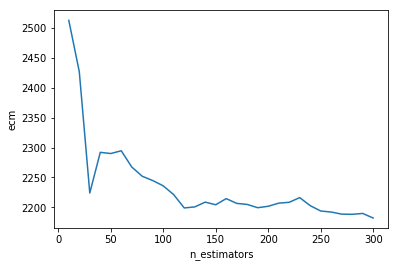

In [600]:
###########

plt.plot(estimator_range, accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('ecm')

accuracy_scores

# Tuning max_features

In [606]:
# list of values to try for max_features
feature_range = range(1, 45)

# list to store the average Accuracy for each value of max_features
accuracy_scores = []

# use 10-fold cross-validation with each value of max_features (WARNING: SLOW!)
for feature in feature_range:
    reg=RandomForestRegressor(n_estimators=300, max_features=feature, random_state=1, n_jobs=-1).fit(X_train,y_train)
    y_pred=reg.predict(X_test)
    #rmse=
    accuracy_scores.append(math.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print(feature)

#print(len(accuracy_scores))
#print(feature_range)
print(min(accuracy_scores))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
2135.666477548923


[2491.8557956643645,
 2293.9454520089325,
 2265.112395989542,
 2192.9500484759396,
 2175.0053298662347,
 2186.1998890183113,
 2192.5206846857573,
 2173.482297373269,
 2177.7058150228477,
 2261.0103792571126,
 2259.7048636156883,
 2184.9987357798423,
 2202.861904992349,
 2229.304609456682,
 2201.9029586171587,
 2236.1290681022447,
 2207.324018991281,
 2191.1215446347064,
 2200.7156363456356,
 2171.723710393159,
 2182.9614451166326,
 2161.2413441737604,
 2144.742749513051,
 2192.6156908215544,
 2192.2313333508664,
 2152.753384667558,
 2237.291789656861,
 2162.303380170891,
 2157.4033132580744,
 2198.625262365197,
 2180.521687753989,
 2158.3017212862815,
 2200.4542109614354,
 2190.5363598828044,
 2176.404771335826,
 2168.5766100333753,
 2187.038627391223,
 2197.1356105893915,
 2135.666477548923,
 2183.194099919122,
 2197.3279841685226,
 2186.4867421075237,
 2164.1017531334246,
 2182.036760551216]

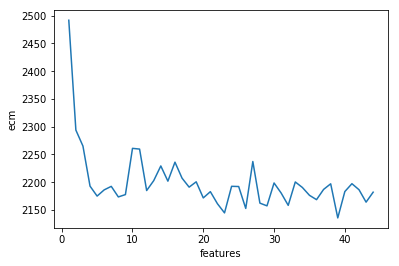

In [607]:
###########

plt.plot(feature_range, accuracy_scores)
plt.xlabel('features')
plt.ylabel('ecm')
accuracy_scores

In [608]:
reg=RandomForestRegressor(n_estimators=300, max_features=39, random_state=1, n_jobs=-1).fit(X_train,y_train)
y_pred=reg.predict(X_test)
#rmse=
math.sqrt(metrics.mean_squared_error(y_test,y_pred))

2135.666477548923

# Segundo método de codificación:

In [610]:
X_ = ce.HashingEncoder(n_components=8).fit_transform(obj_df, axis=1)

In [611]:
dataf=pd.DataFrame(pd.concat([X_, varcont], axis=1))
dataf.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,symboling,normalized_losses,...,num_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1,0,0,2,1,2,2,0,3,115.0,...,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,1,0,0,2,1,2,2,0,3,115.0,...,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,0,0,1,2,2,2,0,1,115.0,...,6,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,3,0,0,0,2,1,1,1,2,164.0,...,4,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,3,0,0,0,1,1,2,1,2,164.0,...,5,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [612]:
y=dataf.price
X=dataf.drop('price', axis='columns',inplace=False)

In [613]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9)

# tuning n_estimators

In [614]:
# list of values to try for n_estimators
estimator_range = range(10, 310, 10)

# list to store the average Accuracy for each value of n_estimators
accuracy_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    reg=RandomForestRegressor(n_estimators=estimator, random_state=1, n_jobs=-1).fit(X_train,y_train)
    y_pred=reg.predict(X_test)
    #rmse=
    accuracy_scores.append(math.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print(estimator)

print(min(accuracy_scores))

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
2149.7275400947365


[2431.902892125993,
 2328.734129623293,
 2188.217616892423,
 2219.1320471104846,
 2227.1094634296533,
 2225.534185941664,
 2181.1148773308105,
 2191.620380452763,
 2201.6392872479355,
 2191.41816411957,
 2195.4590651277726,
 2185.1616855484403,
 2187.901774237711,
 2174.7704580617115,
 2167.5524020009175,
 2168.7466095776126,
 2169.725344065504,
 2170.0481022502763,
 2163.272679917622,
 2171.8148033736993,
 2169.5236665338884,
 2173.5336371305984,
 2180.0407188521253,
 2165.3194040223616,
 2164.264166689187,
 2164.4073620993754,
 2155.091848501714,
 2159.7435541327804,
 2156.723436591443,
 2149.7275400947365]

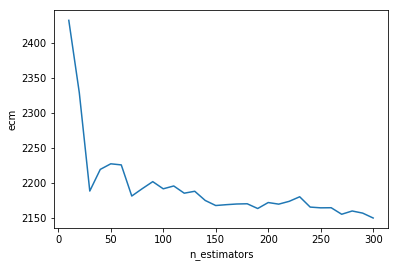

In [615]:
###########

plt.plot(estimator_range, accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('ecm')

accuracy_scores

# Tuning max_features

In [618]:
# list of values to try for max_features
feature_range = range(1, 26)

# list to store the average Accuracy for each value of max_features
accuracy_scores = []

# use 10-fold cross-validation with each value of max_features (WARNING: SLOW!)
for feature in feature_range:
    reg=RandomForestRegressor(n_estimators=300, max_features=feature, random_state=1, n_jobs=-1).fit(X_train,y_train)
    y_pred=reg.predict(X_test)
    #rmse=
    accuracy_scores.append(math.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print(feature)

#print(len(accuracy_scores))
#print(feature_range)
print(min(accuracy_scores))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
2123.5113587159867


[2604.3084691036343,
 2264.8281718712956,
 2153.1641336260723,
 2246.950678681445,
 2265.183154007496,
 2241.1803967770525,
 2180.566009029426,
 2184.7833832378183,
 2147.6381569141913,
 2146.421643852745,
 2174.148773761953,
 2170.666549812531,
 2179.813748114519,
 2138.376232126216,
 2150.282340977567,
 2144.1945221418987,
 2130.9565482950006,
 2123.5113587159867,
 2150.2862229795514,
 2181.7832108015855,
 2149.0230360185988,
 2167.1012476050787,
 2150.224180390842,
 2130.7116162335633,
 2149.7275400947365]

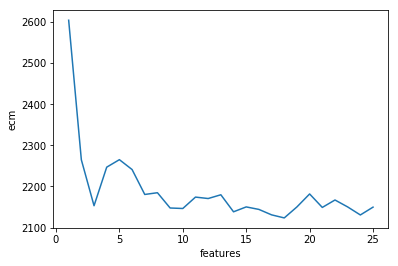

In [619]:
###########

plt.plot(feature_range, accuracy_scores)
plt.xlabel('features')
plt.ylabel('ecm')
accuracy_scores

In [620]:
reg=RandomForestRegressor(n_estimators=300, max_features=18, random_state=1, n_jobs=-1).fit(X_train,y_train)
y_pred=reg.predict(X_test)
#rmse=
math.sqrt(metrics.mean_squared_error(y_test,y_pred))

2123.5113587159867

# El mejor modelo de todos los ajustados durante el proceso, es el que considera solo las variables categoricas como explicativas del precio. Adicionalmente, entre los metodos de codificación HashingEncoder,  BinaryEncoder y dummies, el mas efectivo para los datos en cuestion, resulta ser el que genera las dummies.